In [82]:
import matplotlib.pyplot as plt
import numpy as np
import glob

plt.rcParams["font.family"] = 'STIXGeneral'
plt.rcParams['text.usetex'] = False
plt.rcParams["mathtext.fontset"] = 'cm'
# plt.rcParams['figure.figsize']=[4,3.5]
plt.rcParams['font.size']=20
plt.rcParams['axes.linewidth']=1
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.major.size']=7
plt.rcParams['ytick.major.size']=7
plt.rcParams['xtick.minor.size']=3.5
plt.rcParams['ytick.minor.size']=3.5
plt.rcParams['xtick.major.width']=1
plt.rcParams['ytick.major.width']=1
plt.rcParams['xtick.minor.width']=1
plt.rcParams['ytick.minor.width']=1
plt.rcParams['ytick.right']=True
plt.rcParams['xtick.top']=True

In [ ]:
# use this function to iniizlie measure_redshift.txt
def init_measure_redshift():
    file = open('measure_redshift.txt', 'w')
    file.write('spec z\n')
    nspec = len(glob.glob('data/spectrum/spec*.txt'))
    for n in range(nspec):
        file.write(f'{n:d} {0.:5f}\n')
    file.close()
    
init_measure_redshift()

In [110]:
# Measure redshifts

h0 = 3934.777
k0 = 3969.588
halpha0 = 6564.61

def plot_spec(n, h=np.nan, k = np.nan, halpha=np.nan):
    '''
    Input
    n = spectrum number
    h = estimated Ca H wavelengths (in AA)
    k = estimated Ca K wavelengths (in AA)
    halpha = estimated Halpha wavelengths (in AA)
    If you don't want to use a certain line to measure the redshift, do not specify its wavelength, or set its wavelength np.nan.
    
    Output
    It returns the estimated redshift based on Ca H, Ca K, and Halpha, respectively with the mean value of them.
    '''
    z = np.zeros(3)
    z[:] = np.nan
    
    lamb, flux = np.loadtxt(f'data/spectrum/spec{n}.txt', skiprows=1, unpack=True)
    fig, ax = plt.subplots(1,3, figsize=(15,4))
    ax[0].set_xlabel(r'Wavelength (${\rm \AA}$)')
    ax[1].set_xlabel(r'Wavelength (${\rm \AA}$)')
    ax[2].set_xlabel(r'Wavelength (${\rm \AA}$)')
    ax[0].set_ylabel('Flux')
    
    ax[0].plot(lamb, flux, 'k-', linewidth=0.5)
    
    if any(np.isnan([h,k])):
        pass
    else:
        range_hk = (lamb>0.97*h)&(lamb<1.03*k)
        lamb_hk, flux_hk = lamb[range_hk], flux[range_hk]
        ax[1].plot(lamb_hk, flux_hk, 'k-')
        ax[1].axvline(h, linestyle='--')
        ax[1].axvline(k, linestyle='--')
        z[0], z[1] = (h-h0)/h0, (k-k0)/k0
        
    if np.isnan(halpha):
        pass
    else:
        range_halpha = (lamb>0.99*halpha)&(lamb<1.01*halpha)
        lamb_halpha, flux_halpha = lamb[range_halpha], flux[range_halpha]
        ax[2].plot(lamb_halpha, flux_halpha, 'k-')
        ax[2].axvline(halpha, linestyle='--')
        z[2] = (halpha-halpha0)/halpha
    
    print(f'z_h={z[0]:.5f}, z_k={z[1]:.5f}, z_halpha={z[2]:.5f}')
    z = z[~np.isnan(z)].mean()
    print(f'z={z:.5f}')
    
    with open('measure_redshift.txt', 'r') as file:
        spec_z = [line.strip().split(' ') for line in file]

    spec_z[n+1][1] = f'{z:.5f}'

    with open('measure_redshift.txt', 'w') as file:
        for line in spec_z:
            file.write(' '.join(line) + '\n')
    


z_h=0.00463, z_k=0.00464, z_halpha=nan
z=0.00463


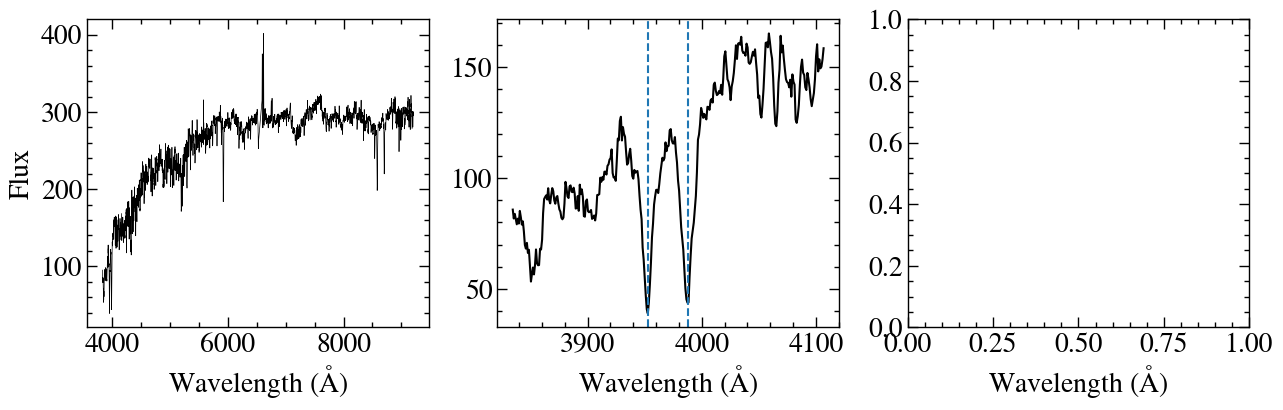

In [208]:
plot_spec(19, h=3953, k=3988)